## 🔬 Python Lab: Bayesian Linear Regression
> [Principles of ML course](https://github.com/mnarimani/PML_Spring2025_SUT) - Spring 2025 - Sharif <br>
> Lab sessions - Session 6 - April 5, 2025 <br>
> Author: M Narimani <br>
> Ref: [K Murphy's Prob. ML Textbook](https://github.com/probml/pyprobml/blob/master/notebooks/book1/11/linreg_2d_bayes_demo.ipynb)

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mnarimani/PML_Spring2025_SUT/blob/main/Week06/01_BayesianLinReg_TODO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mnarimani/PML_Spring2025_SUT/blob/main/Week06/01_BayesianLinReg_TODO.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## 🛠️ Setup: Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal, norm

# Set random seed for reproducibility
np.random.seed(42)

## 1️⃣ Generate Synthetic Data

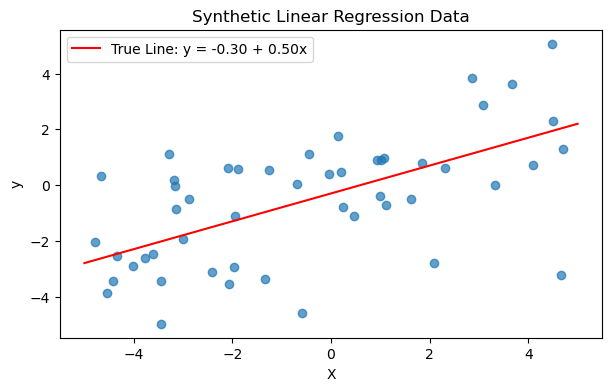

In [6]:
def generate_linear_data(n_samples=100, n_features=1, noise=0.5, w_true=None):
    if w_true is None:
        # Generate random weights
        w_true = np.random.normal(0, 1, n_features + 1)
    
    # Generate random features
    X = np.random.uniform(-5, 5, (n_samples, n_features))
    
    # Add bias term (intercept)
    X_with_bias = np.column_stack([np.ones(n_samples), X])
    
    # Generate target values with noise
    y = X_with_bias @ w_true + np.random.normal(0, noise, n_samples)
    
    return X, y, w_true

# Generate 1D data for visualization
X_1d, y_1d, w_true_1d = generate_linear_data(n_samples=50, n_features=1, 
                                            noise=2.0, w_true=np.array([-0.3, 0.5]))

# Plot the data
plt.figure(figsize=(7, 4))
plt.scatter(X_1d, y_1d, alpha=0.7)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Linear Regression Data')

# Plot the true line
x_line = np.linspace(-5, 5, 100)
y_line = w_true_1d[0] + w_true_1d[1] * x_line
plt.plot(x_line, y_line, 'r-', label=f'True Line: y = {w_true_1d[0]:.2f} + {w_true_1d[1]:.2f}x')
plt.legend()
plt.show()

## 2️⃣ Maximum Likelihood Estimation (MLE) for Linear Regression

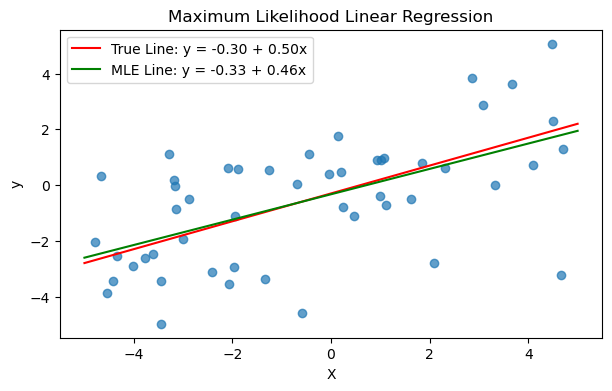

In [8]:
def fit_linear_regression_numpy(X, y):
    # Add bias term (intercept)
    X_with_bias = np.column_stack([np.ones(len(X)), X])
    
    # Compute weights using the normal equation: w = (X^T X)^(-1) X^T y
    w = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y
    
    return w

# Fit MLE linear regression
w_mle = fit_linear_regression_numpy(X_1d, y_1d)

# Plot the result
plt.figure(figsize=(7, 4))
plt.scatter(X_1d, y_1d, alpha=0.7)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Maximum Likelihood Linear Regression')

# Plot the true line
plt.plot(x_line, y_line, 'r-', label=f'True Line: y = {w_true_1d[0]:.2f} + {w_true_1d[1]:.2f}x')

# Plot the MLE line
y_mle = w_mle[0] + w_mle[1] * x_line
plt.plot(x_line, y_mle, 'g-', label=f'MLE Line: y = {w_mle[0]:.2f} + {w_mle[1]:.2f}x')
plt.legend();

In [9]:
# Compare with scikit-learn
lr_sklearn = LinearRegression().fit(X_1d, y_1d)
w_sklearn = np.array([lr_sklearn.intercept_, lr_sklearn.coef_[0]])

print("MLE weights (numpy):", w_mle)
print("MLE weights (sklearn):", w_sklearn)
print("True weights:", w_true_1d)

MLE weights (numpy): [-0.33005545  0.4553132 ]
MLE weights (sklearn): [-0.33005545  0.4553132 ]
True weights: [-0.3  0.5]


## 3️⃣ Bayesian Linear Regression from Scratch
**Key Equations**:
- Posterior distribution:  
  $p(\mathbf{w}|\mathbf{X},\mathbf{y}) = \mathcal{N}(\mathbf{\mu}_{\text{post}}, \mathbf{\Sigma}_{\text{post}})$  
  $\mathbf{\Sigma}_{\text{post}} = (\alpha \mathbf{I} + \beta \mathbf{X}^T\mathbf{X})^{-1}$  
  $\mathbf{\mu}_{\text{post}} = \beta \mathbf{\Sigma}_{\text{post}} \mathbf{X}^T \mathbf{y}$
- Predictive distribution:  
  $p(y^*|x^*,\mathbf{X},\mathbf{y}) = \mathcal{N}(x^{*T}\mu_{\text{post}}, \frac{1}{\beta} + x^{*T}\mathbf{\Sigma}_{\text{post}}x^*)$

In [11]:
class BayesianLinearRegression:
    def __init__(self, alpha=1.0, beta=1.0):
        self.alpha = alpha  # Prior precision
        self.beta = beta    # Noise precision
        self.w_mean = None  # Posterior mean (μ_post)
        self.w_cov = None   # Posterior covariance (Σ_post)

> **TODO**: Implement `fit` method

In [13]:
class BayesianLinearRegression(BayesianLinearRegression):
    def fit(self, X, y):
        X_with_bias = np.column_stack([np.ones(len(X)), X])
        n_features = X_with_bias.shape[1]
        
        # TODO: Compute posterior covariance matrix
        # Σ_post = (αI + βXᵀX)^−1
        # self.w_cov = ...
        
        # TODO: Compute posterior mean vector
        # μ_post = βΣ_post Xᵀ y
        # self.w_mean = ...
        
        return self

> **TODO**: Implement `predict` method

In [15]:
class BayesianLinearRegression(BayesianLinearRegression):
    def predict(self, X, return_std=False):
        X_with_bias = np.column_stack([np.ones(len(X)), X])
        y_pred_mean = X_with_bias @ self.w_mean
        
        if return_std:
            # TODO: Calculate predictive variance
            # Var[y*] = 1/β + x*ᵀΣ_post x*
            # y_pred_var = np.zeros(len(X))
            return y_pred_mean, np.sqrt(y_pred_var)
            
        return y_pred_mean

In [16]:
class BayesianLinearRegression(BayesianLinearRegression):
    def sample_posterior(self, n_samples=5): # Draw samples from the posterior distribution over weights.
        return np.random.multivariate_normal(self.w_mean, self.w_cov, size=n_samples)

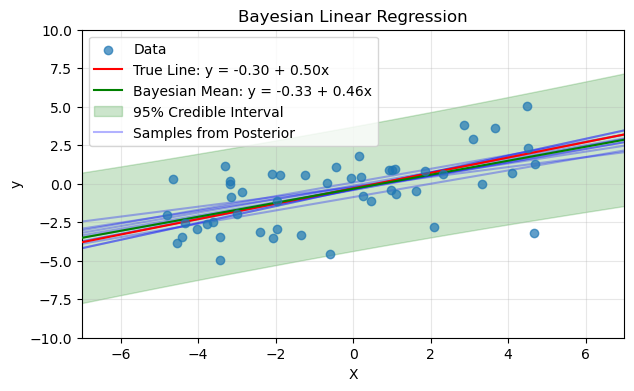

In [17]:
# Fit Bayesian Linear Regression
blr = BayesianLinearRegression(alpha=0.1, beta=1/4)  # Prior precision and noise precision
blr.fit(X_1d, y_1d)

# Make predictions with uncertainty
X_test = np.linspace(-7, 7, 100).reshape(-1, 1)
y_pred_mean, y_pred_std = blr.predict(X_test, return_std=True)

# Draw samples from the posterior
weight_samples = blr.sample_posterior(n_samples=10)

# Plot the results
plt.figure(figsize=(7, 4))
plt.scatter(X_1d, y_1d, alpha=0.7, label='Data', zorder=5) # Plot data points
plt.plot(X_test, w_true_1d[0] + w_true_1d[1] * X_test, 'r-', 
         label=f'True Line: y = {w_true_1d[0]:.2f} + {w_true_1d[1]:.2f}x', zorder=3) # Plot the true line
plt.plot(X_test, y_pred_mean, 'g-', 
         label=f'Bayesian Mean: y = {blr.w_mean[0]:.2f} + {blr.w_mean[1]:.2f}x', zorder=4) # Plot the Bayesian mean prediction
plt.fill_between(X_test.flatten(), 
                  y_pred_mean - 2 * y_pred_std,
                  y_pred_mean + 2 * y_pred_std,
                  alpha=0.2, color='g', label='95% Credible Interval') # Plot the uncertainty (2 standard deviations)

# Plot sample lines from the posterior
for i, w in enumerate(weight_samples):
    plt.plot(X_test, w[0] + w[1] * X_test, 'b-', alpha=0.3, zorder=2)
    if i == 0:  # Add label for the first sample only
        plt.plot(X_test, w[0] + w[1] * X_test, 'b-', alpha=0.3, 
                 label='Samples from Posterior', zorder=2)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Bayesian Linear Regression')
plt.xlim(-7, 7)
plt.ylim(-10, 10)
plt.grid(True, alpha=0.3)
plt.legend();

## 4️⃣ Visualizing the Posterior Distribution

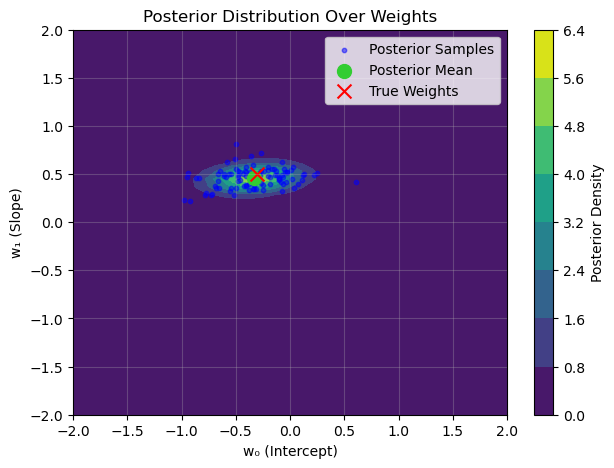

In [19]:
def plot_posterior_2d(blr, w_true, grid_size=100, bounds=(-3, 3)):
    # Create a grid of weight values
    w0_grid = np.linspace(bounds[0], bounds[1], grid_size)
    w1_grid = np.linspace(bounds[0], bounds[1], grid_size)
    W0, W1 = np.meshgrid(w0_grid, w1_grid)
    
    # Compute the posterior density at each grid point
    Z = np.zeros((grid_size, grid_size))
    for i in range(grid_size):
        for j in range(grid_size):
            w = np.array([W0[i, j], W1[i, j]])
            Z[i, j] = multivariate_normal.pdf(w, mean=blr.w_mean, cov=blr.w_cov)
    
    # Plot the posterior as a contour plot
    plt.figure(figsize=(7, 5))
    
    # Plot the contour
    contour = plt.contourf(W0, W1, Z, cmap='viridis')#, alpha=0.8, levels=20)
    plt.colorbar(contour, label='Posterior Density')
    
    # Plot samples from the posterior
    samples = blr.sample_posterior(n_samples=100)
    plt.scatter(samples[:, 0], samples[:, 1], c='blue', s=10, alpha=0.5, label='Posterior Samples')

    # Mark the posterior mean
    plt.scatter(blr.w_mean[0], blr.w_mean[1], c='limegreen', s=100, marker='o', label='Posterior Mean')
    
    # Mark the true weights
    plt.scatter(w_true[0], w_true[1], c='red', s=100, marker='x', label='True Weights')
    
    plt.xlabel('w₀ (Intercept)')
    plt.ylabel('w₁ (Slope)')
    plt.title('Posterior Distribution Over Weights')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Visualize the posterior
plot_posterior_2d(blr, w_true_1d, grid_size=50, bounds=(-2, 2))

## 5️⃣ Effect of Sample Size on Posterior

In [21]:
likelihoodSD = 2  # Assume we know the true noise SD

# Function to create likelihood function for a single data point
def likelihood_function_maker(x0, y0):
    def likelihood_function(w0, w1):
        y_pred = w0 + w1 * x0
        err = y0 - y_pred
        return norm.pdf(err, loc=0, scale=likelihoodSD)
    return np.vectorize(likelihood_function)

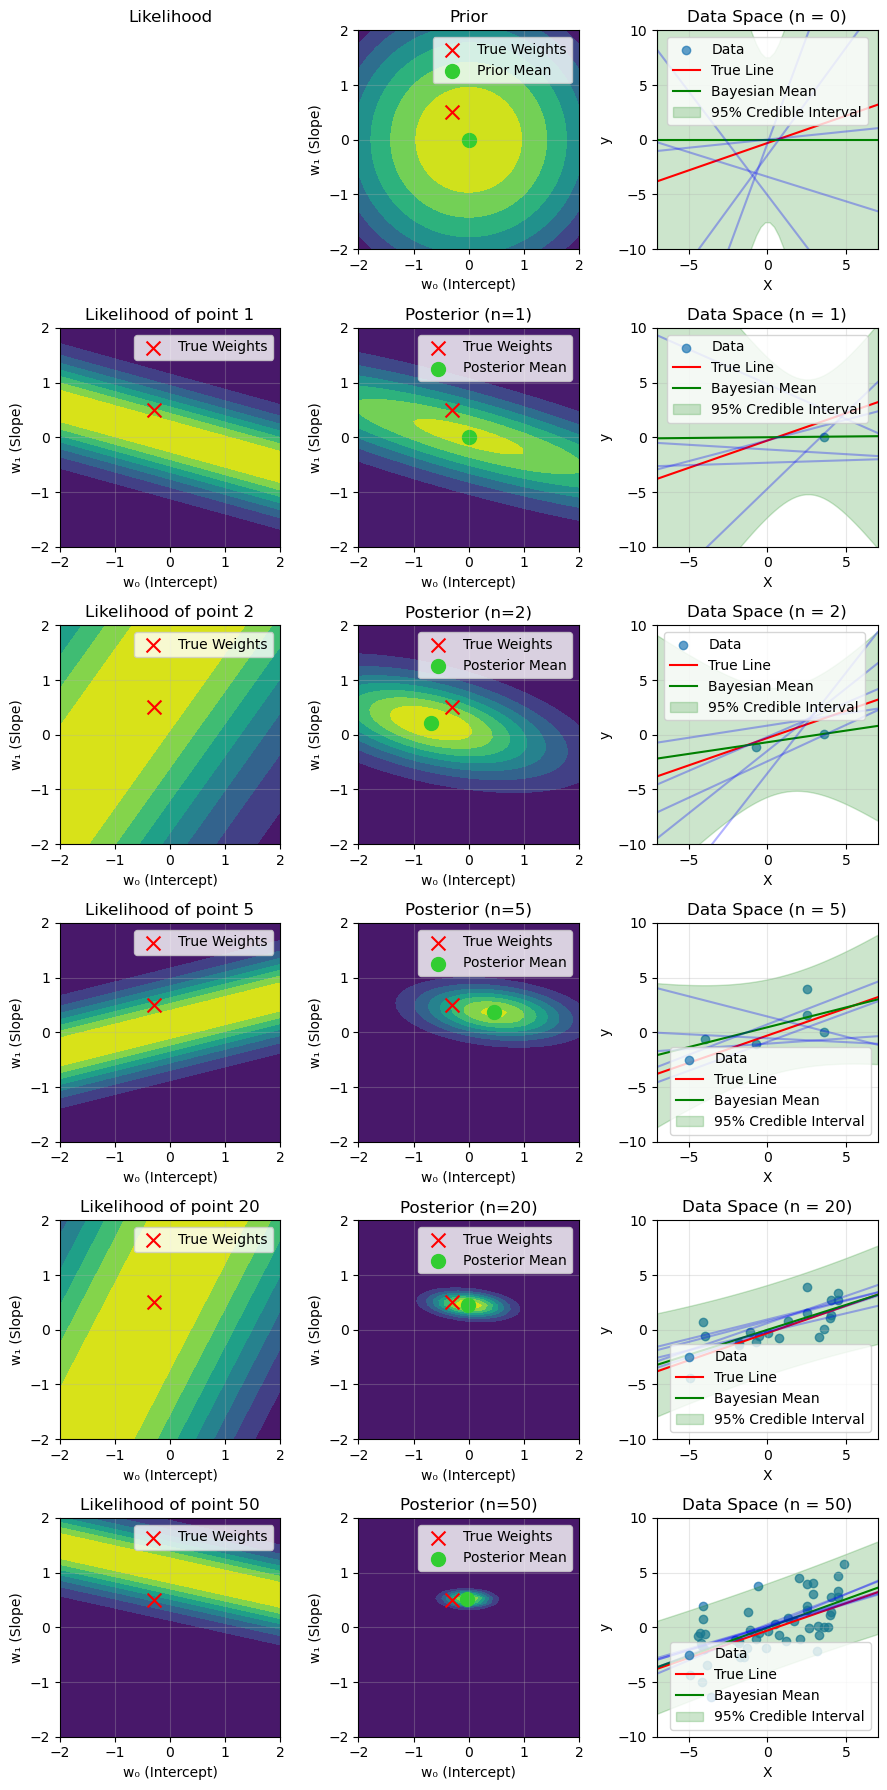

In [22]:
def demonstrate_sequential_learning(n_points_list=[1, 2, 10, 50], noise=2.0):
    # Generate a larger dataset
    X_full, y_full, w_true = generate_linear_data(
        n_samples=max(n_points_list), 
        n_features=1, 
        noise=noise, 
        w_true=np.array([-0.3, 0.5])
    )
    
    # Create a figure with subplots for each step
    fig, axs = plt.subplots(len(n_points_list), 3, figsize=(9, 3*len(n_points_list)))
    
    for i, n_points in enumerate(n_points_list):
        # Use only the first n_points
        X = X_full[:n_points]
        y = y_full[:n_points]
        
        # Fit Bayesian linear regression
        blr = BayesianLinearRegression(alpha=0.1, beta=1/(noise**2))
        blr.fit(X, y)
        
        # Make predictions
        X_test = np.linspace(-7, 7, 50).reshape(-1, 1)
        y_pred_mean, y_pred_std = blr.predict(X_test, return_std=True)

        # Plot likelihood for the latest observation (except for prior)
        # Create a grid of weight values
        grid_size = 50
        bounds = (-2, 2)
        w0_grid = np.linspace(bounds[0], bounds[1], grid_size)
        w1_grid = np.linspace(bounds[0], bounds[1], grid_size)
        W0, W1 = np.meshgrid(w0_grid, w1_grid)
        if n_points > 0:
            latest_likelihood = likelihood_function_maker(X[n_points-1], y[n_points-1])
            # axs[i, 0].contourf(W0, W1, latest_likelihood(W0, W1), 100, cmap='viridis')

            # Plot the posterior as a contour plot
            contour = axs[i, 0].contourf(W0, W1, latest_likelihood(W0, W1), cmap='viridis')#, alpha=0.8, levels=20)
            
            # Mark the true weights
            axs[i, 0].scatter(w_true[0], w_true[1], c='red', s=100, marker='x', label='True Weights')
            
            axs[i, 0].set_xlabel('w₀ (Intercept)')
            axs[i, 0].set_ylabel('w₁ (Slope)')
            axs[i, 0].set_title(f"Likelihood of point {n_points}")
            axs[i, 0].legend()
            axs[i, 0].set_xlim(bounds)
            axs[i, 0].set_ylim(bounds)
            axs[i, 0].grid(True, alpha=0.3)
        else:
            axs[i, 0].set_title("Likelihood")
            axs[i, 0].axis('off')
        
        # Visualize the posterior - parameter space   
        # Compute the posterior density at each grid point
        Z = np.zeros((grid_size, grid_size))
        for j in range(grid_size):
            for k in range(grid_size):
                w = np.array([W0[j, k], W1[j, k]])
                Z[j, k] = multivariate_normal.pdf(w, mean=blr.w_mean, cov=blr.w_cov)
        
        # Plot the posterior as a contour plot
        contour = axs[i, 1].contourf(W0, W1, Z, cmap='viridis')#, alpha=0.8, levels=20)
        
        # Mark the true weights
        axs[i, 1].scatter(w_true[0], w_true[1], c='red', s=100, marker='x', label='True Weights')
        
        # Mark the posterior mean
        label = "Prior Mean" if n_points == 0 else "Posterior Mean"
        axs[i, 1].scatter(blr.w_mean[0], blr.w_mean[1], c='limegreen', s=100, marker='o', 
                         label=label)
        
        axs[i, 1].set_xlabel('w₀ (Intercept)')
        axs[i, 1].set_ylabel('w₁ (Slope)')
        title = "Prior" if n_points == 0 else f"Posterior (n={n_points})"
        axs[i, 1].set_title(title)
        # axs[i, 1].set_title(f'Parameter Space (n = {n_points})')
        axs[i, 1].legend()
        axs[i, 1].set_xlim(bounds)
        axs[i, 1].set_ylim(bounds)
        axs[i, 1].grid(True, alpha=0.3)

        # Plot the data space
        axs[i, 2].scatter(X, y, alpha=0.7, label='Data')
        axs[i, 2].plot(X_test, w_true[0] + w_true[1] * X_test, 'r-', 
                      label='True Line')
        axs[i, 2].plot(X_test, y_pred_mean, 'g-', 
                      label='Bayesian Mean')
        axs[i, 2].fill_between(X_test.flatten(), 
                              y_pred_mean - 2 * y_pred_std,
                              y_pred_mean + 2 * y_pred_std,
                              alpha=0.2, color='g', label='95% Credible Interval')
        
        # Draw samples from the posterior for visualization
        weight_samples = blr.sample_posterior(n_samples=5)
        for w in weight_samples:
            axs[i, 2].plot(X_test, w[0] + w[1] * X_test, 'b-', alpha=0.3)
        
        axs[i, 2].set_xlabel('X')
        axs[i, 2].set_ylabel('y')
        axs[i, 2].set_title(f'Data Space (n = {n_points})')
        axs[i, 2].legend()
        axs[i, 2].set_xlim(-7, 7)
        axs[i, 2].set_ylim(-10, 10)
        axs[i, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Demonstrate how the posterior changes as we observe more data
demonstrate_sequential_learning(n_points_list=[0, 1, 2, 5, 20, 50], noise=2.0)

## 📝 Exercises

> **Exercise 1**: Explore Prior Sensitivity
How do different prior distributions affect the posterior? <br>
Try changing the prior precision and observe the effects, especially with limited data.
>
> **TODO**: Implement a function to investigate how different priors affect the posterior <br>
Hint: Try different values of priorPrecision and see how it affects the posterior

> **Exercise 2**: Extend to a Bayesian Ridge Regression <br>
Implement Bayesian Ridge Regression where both the weight precision and the noise <br>
precision are learned from the data.
>
> **TODO**: Implement Bayesian Ridge Regression with EM algorithm <br>
Hint: Iterate between updating the posterior and updating both the weight precision <br>
and noise precision

> **Exercise 3**: Nonlinear Features <br>
Extend the linear model with nonlinear features (e.g., polynomial features) and <br>
use Bayesian linear regression on this expanded feature space.
>
> **TODO**: Implement Bayesian linear regression with polynomial features <br>
Hint: Create polynomial features and then apply Bayesian linear regression